# Visualizing Earnings Based on College Majors

This project involves analyzing a [dataset](https://github.com/fivethirtyeight/data/tree/master/college-majors) from fivethirtyeight about job outcomes for students in various college majors. 

Three main questions are analyzed:
* Do students in more popular majors make more money?
* Do men or women tend to show a preference for higher or lower paying majors?
* What is the most common median salary range?

The analysis suggests that there is no correlation between the popularity of a major and its median starting salary, but there may be a very slight negative correlation between the popularity of a major category and salary.

It's clear that men tend to select higher paying majors, and women tend to select lower paying majors. This phenomenon is especially starkly visible in the visualizations of the gender distributions of the highest and lowest paid majors.

Finally, the median starting salary ranges from 20,000 to about 80,000 dollars (with one outlier–petroleum engineering). The overall median salary across all majors is 36,000 dollars.

Scroll down to each question to view the complete analysis and its results.

# Setup

Scroll down to the visualizations section to view the analysis and its results.

In [458]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
recent_grads = pd.read_csv("/Users/jeremymahoney/Data Science/Datasets/recent-grads.csv")

In [149]:
# Priting first row
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [150]:
# Dropping the rows with missing values, then finding out how many were dropped.
raw_data_count = len(recent_grads)
print(raw_data_count)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

173
172


# Visualizations

## Do students in more popular majors make more money?

The Total column contains the total number of people in the US that majored in a given field, and the Median column contains the median starting salary of people who majored in that field. 

Here is a visualization of the correlation between popularity and median starting salary with a scatter plot.

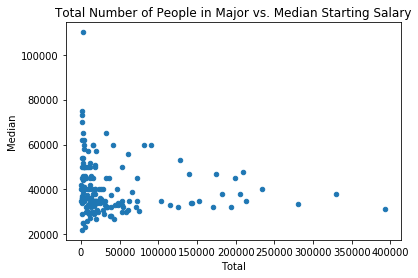

In [193]:
recent_grads.plot(x="Total", y="Median", kind="scatter", title="Total Number of People in Major vs. Median Starting Salary")

It doesn't seem that there is a significant correlation between popularity and median starting salary. This could parly be due to the fact that there exist many relatively similar majors with similar job prospects. For instance, these are all the majors in the category "Computers & Mathematics":

In [299]:
recent_grads[recent_grads["Major_category"]=="Computers & Mathematics"]["Major"]

20                                    COMPUTER SCIENCE
41                                         MATHEMATICS
42                    COMPUTER AND INFORMATION SYSTEMS
45                                INFORMATION SCIENCES
46                     STATISTICS AND DECISION SCIENCE
47                                 APPLIED MATHEMATICS
52                    MATHEMATICS AND COMPUTER SCIENCE
53            COMPUTER PROGRAMMING AND DATA PROCESSING
81     COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY
84          COMPUTER NETWORKING AND TELECOMMUNICATIONS
105                         COMMUNICATION TECHNOLOGIES
Name: Major, dtype: object

Many of these majors, such as Mathematics and Applied Mathematics, are very similar, and they likely have similar job prospects. It could be insightful to look each category's popularity vs. the mean starting salary of that category.

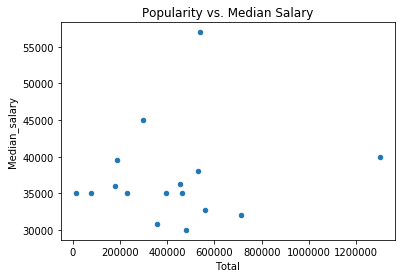

In [325]:
categories = recent_grads["Major_category"].unique()
category_data = pd.DataFrame(columns=["Category", "Median_salary", "Total"])
category_data["Category"] = categories
for i, category in enumerate(categories):
    category_data.iloc[i]["Median_salary"] = recent_grads[recent_grads["Major_category"] == category]["Median"].median()
    category_data.iloc[i]["Total"] = recent_grads[recent_grads["Major_category"] == category]["Total"].sum()
category_data[["Median_salary", "Total"]] = category_data[["Median_salary", "Total"]].astype(int)

category_data.plot(x="Total", y="Median_salary", kind="Scatter", title="Popularity vs. Median Salary")


Interestingly, it looks like there is a slight negative correlation between the popularity of a category and its starting salary, though the correlation is very weak.

*I should come back to this later and test it for statistical significance.*

Here is a bar graph that shows the median starting salary of each category, with the categories ordered from most to least popular:

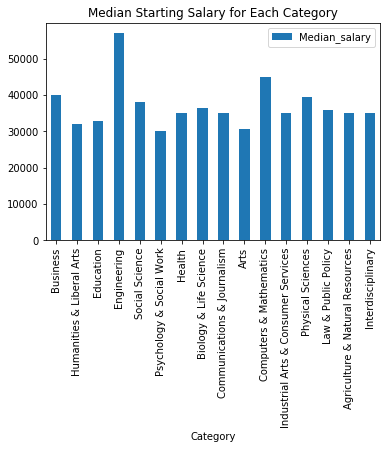

In [327]:
category_data = category_data.sort_values(by="Total", axis=0, ascending=False)
category_data.plot(x="Category", y="Median_salary", kind="bar", title="Median Starting Salary for Each Category")

On average, engineers have considerably higher starting salaries than any other category, followed most closely by Computers & Mathematics.

## Do men or women tend to show a preference for higher or lower paying majors?

First, here is a bar graph that shows the median starting salaries of the top 20 most popular majors, shaded by the percentage of women who choose the major. More yellow indicates more men, while more red indicates more women.

In [433]:
top_20_majors = recent_grads[recent_grads["Total"] >= recent_grads.iloc[recent_grads["Total"].sort_values(ascending=False).index[20]]["Total"]][:20]
top_20_majors = top_20_majors.sort_values(by="Median", ascending=False)

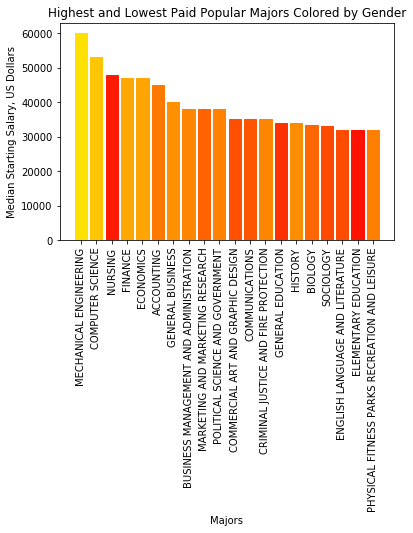

In [439]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bars = ax.bar(x=top_20_majors["Major"], height=top_20_majors["Median"])
ax.set_xticklabels(top_20_majors["Major"], rotation=90)
ax.set_title("Highest and Lowest Paid Popular Majors Colored by Gender")
ax.set_xlabel("Majors")
ax.set_ylabel("Median Starting Salary, US Dollars")
for i, b in enumerate(bars):
    b.set_color((1, 1-(top_20_majors.iloc[i]["ShareWomen"]), 0))

In [401]:
top_20_majors[["Major", "ShareWomen"]]

,Major,ShareWomen
8,MECHANICAL ENGINEERING,0.119559
20,COMPUTER SCIENCE,0.222695
34,NURSING,0.896019
35,FINANCE,0.340825
36,ECONOMICS,0.355469
40,ACCOUNTING,0.524153
57,GENERAL BUSINESS,0.436302
76,BUSINESS MANAGEMENT AND ADMINISTRATION,0.473190
77,MARKETING AND MARKETING RESEARCH,0.615727
78,POLITICAL SCIENCE AND GOVERNMENT,0.485930


The top two most well paid majors in this top 20 popularity group, Mechanical Engineering and Computer Science, are overwhelmingly male. The 3rd most well paid major in the goup, nursing, is overwhelmingly female, but this is an exception. The next 5 most well paid majors (with the exception of accounting, which is almost equal) are majority male, while the 5 least well paid majors in this group are all majority female. (Some of which, such as elementary education, are overwhelmingly female.)

It seems that the most well-paid popular majors tend to attract men, and the most poorly paid popular majors tend to attract women.

To visualize this trend even more starkly, here is the same graph as above, but instead of showing the 20 most popular majors, it shows the 10 most highly paid majors and the 10 most poorly paid majors.

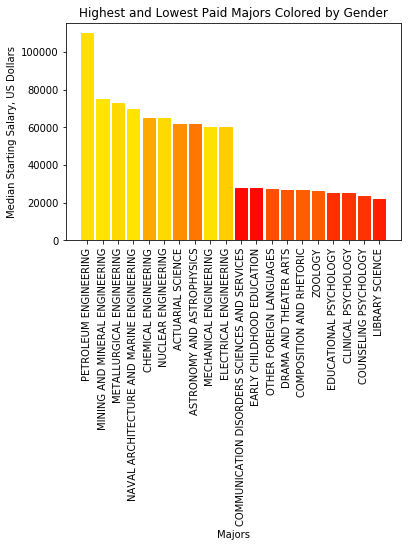

In [446]:
top_10_pay_majors = recent_grads[recent_grads["Median"] >= recent_grads.iloc[recent_grads["Median"].sort_values(ascending=False).index[10]]["Median"]][:10]
bottom_10_pay_majors = recent_grads[recent_grads["Median"] <= recent_grads.iloc[recent_grads["Median"].sort_values(ascending=False).index[-10]]["Median"]][-10:]
extreme_pay_majors = pd.DataFrame()
extreme_pay_majors = top_10_pay_majors
extreme_pay_majors = extreme_pay_majors.append(bottom_10_pay_majors)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bars = ax.bar(x=extreme_pay_majors["Major"], height=extreme_pay_majors["Median"])
ax.set_xticklabels(extreme_pay_majors["Major"], rotation=90)
ax.set_title("Highest and Lowest Paid Majors Colored by Gender")
ax.set_xlabel("Majors")
ax.set_ylabel("Median Starting Salary, US Dollars")
for i, b in enumerate(bars):
    b.set_color((1, 1-(extreme_pay_majors.iloc[i]["ShareWomen"]), 0))
    

In [444]:
extreme_pay_majors[["Major", "ShareWomen"]]

,Major,ShareWomen
0,PETROLEUM ENGINEERING,0.120564
1,MINING AND MINERAL ENGINEERING,0.101852
2,METALLURGICAL ENGINEERING,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.107313
4,CHEMICAL ENGINEERING,0.341631
5,NUCLEAR ENGINEERING,0.144967
6,ACTUARIAL SCIENCE,0.441356
7,ASTRONOMY AND ASTROPHYSICS,0.535714
8,MECHANICAL ENGINEERING,0.119559
9,ELECTRICAL ENGINEERING,0.196450


With the exceptions of Actuarial Science, Astronomy & Astrophysics, and Chemical Engineering (two of which are still majority male), the rest of the top 10 most highly paid majors consist almost entirely of men, with men taking up over between 80 and 90 percent of each major. Conversely, every one of the 10 lowest paid majors is over 60% women, with two over 96% women.

Overall, it is evident that men tend to gravitate towards majors with a higher starting salary, and women tend to gravitate towards majors with a lower starting salary.

This certainly highlights the still-present cultural forces that often push women away from lucrative STEM fields and push men away from the humanities and education.

It would be interesting to look at historical data for which majors tend to attract each gender.

## What is the most common median salary range?

Here is a histogram that shows the range of median starting salaries:

36000.0


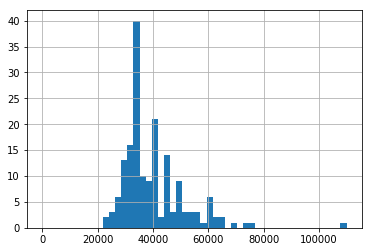

In [456]:
recent_grads["Median"].hist(bins=50, range=(0, 110000))
print(recent_grads["Median"].median())

The majority of the median starting salaries are between 30,000 and 40,000 dollars, with a spike at about 35,000 dollars. The median starting salary across all majors is 36,000 dollars.